## Poster and Video

#### Tracking training, engineering imporvement

In [1]:
from data.utils import to_dataloader, split, get_covid_dls
from data.xray_dataset import DEFAULT_TRANSFORMS, IMAGENET_NORMALIZE
import torchvision
from torchvision import transforms
from torch.utils.data.dataset import random_split
import torch
import pandas as pd
import os 
import matplotlib.pyplot as plt
from data.utils import plot_roc, plot_confusion_matrix, SEED
import numpy as np
import random 

from main import *
from utils import all_loss, all_opt
import torchvision.models as models
import seaborn as sns
torch.manual_seed(SEED)
ROOT_DIR = '../data/10_all_data_foldered/'
DATA_DIR = '../data/10_all_data_foldered/images'
IMG_DIR = DATA_DIR
tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((300, 300)),
    transforms.RandomCrop((224, 224)),
    # transforms.RandomHorizontalFlip(0.1),
    transforms.RandomRotation(5),
    transforms.Resize((240,240)),
    transforms.ColorJitter(0.1, 0.1, 0, 0),
    ])

# pytorch from ImageFolder
# ds = torchvision.datasets.ImageFolder(DATA_DIR, transform=tfms)
# train, val = int(len(ds) *0.6), int(len(ds) *0.2)
# test = len(ds) - train - val
# datasets =  random_split(ds, [train, val, test])
df = pd.read_csv(os.path.join(ROOT_DIR, 'data.csv'))
no_ct = pd.read_csv(os.path.join(ROOT_DIR, 'no_ct.csv'))
i = 4

In [4]:
## Model weights
model = 'densenet161'
dls = get_covid_dls(16, no_ct, 'filename', 'label', root=DATA_DIR, reg=False)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_{i}', 'wd':0, 'epochs':5}
trainer = Trainer('report', model, dls, hp, weights=None, sched=False)

In [5]:
trainer.one_cycle()

  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.6248893737792969, acc:0.7617890131259115
100%|██████████| 43/43 [00:13<00:00,  3.14it/s]

epoch val info: loss:0.5919467806816101, acc:0.7944606413994169
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.3740426301956177, acc:0.8638794360719494
  0%|          | 0/129 [00:00<?, ?it/s]
epoch val info: loss:0.866578221321106, acc:0.7332361516034985
epoch number: 2
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.2677261531352997, acc:0.9086047642197375
  0%|          | 0/129 [00:00<?, ?it/s]
epoch val info: loss:2.533693313598633, acc:0.6545189504373178
epoch number: 3
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.2996964156627655, acc:0.9032571706368497
  0%|          | 0/129 [00:00<?, ?it/s]
epoch val info: loss:0.5922584533691406, acc:0.8017492711370262
epoch number: 4
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.23623275756835938, acc:0.9173553719008265
100%|███

all_recall [0.91034483 0.91851852 0.86715867]
f1_score 0.8966025291253162
weighted_recall 0.8965014577259475
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


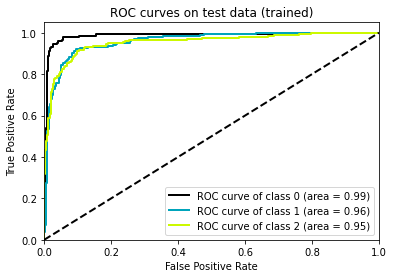

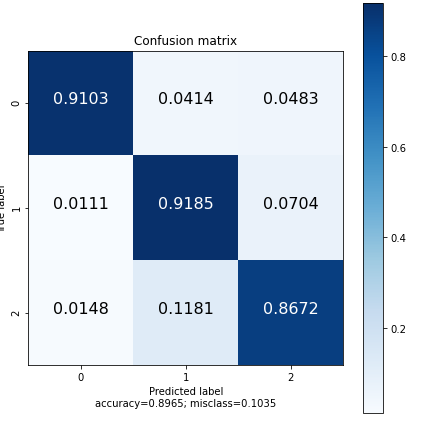

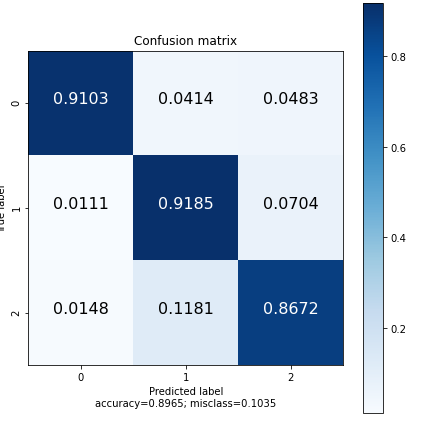

In [10]:
trainer.cms[1] = None
preds, labels = trainer.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer.cms[1], trainer.class_names)

all_recall [0.90410959 0.92015209 0.83636364]
f1_score 0.8829108976346038
weighted_recall 0.8830409356725146
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


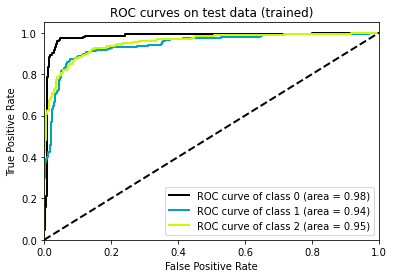

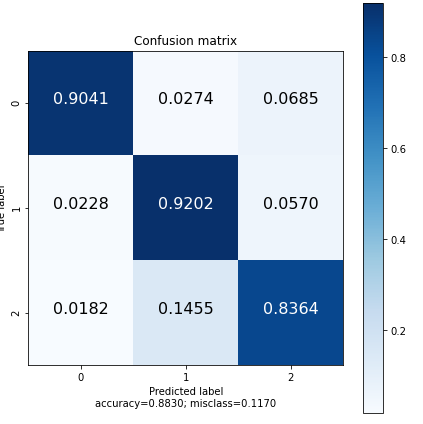

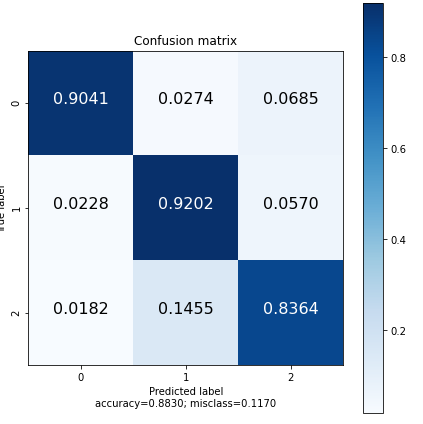

In [6]:
trainer.cms[2] = None
preds, labels = trainer.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer.cms[2], trainer.class_names)

In [2]:
## Model weights
model = 'densenet161'
dls = get_covid_dls(16, no_ct, 'filename', 'label', root=DATA_DIR, reg=True)
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_reg_{i}', 'epochs':5, 'wd':0.001}
trainer2 = Trainer('report', model, dls, hp, weights=None, sched=True)

In [3]:
trainer2.one_cycle()

  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.6250741481781006, acc:0.7695673310646572
100%|██████████| 43/43 [00:13<00:00,  3.13it/s]

epoch val info: loss:0.9164360165596008, acc:0.6647230320699709
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.42947688698768616, acc:0.8463782207097715
  0%|          | 0/129 [00:00<?, ?it/s]
epoch val info: loss:0.9301441311836243, acc:0.5801749271137027
epoch number: 2
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.24346202611923218, acc:0.9246475449684006
100%|██████████| 43/43 [00:14<00:00,  3.03it/s]

epoch val info: loss:0.24852344393730164, acc:0.9139941690962099
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.21700382232666016, acc:0.9270782693242586
100%|██████████| 43/43 [00:13<00:00,  3.14it/s]

epoch val info: loss:0.16845959424972534, acc:0.9489795918367347
  0%|          | 0/43 [00:00<?, ?it/s]
epoch trng info: loss:0.17977790534496307, acc:0.9470102090422946
100%|██████████

all_recall [0.97931034 0.95185185 0.94095941]
f1_score 0.9533245819161837
weighted_recall 0.9533527696793003
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\ranking.py:103: DeprecationWarning: The 'reorder' parameter has been deprecated in version 0.20 and will be removed in 0.22. It is recommended not to set 'reorder' and ensure that x is monotonic increasing or monotonic decreasing.
  DeprecationWarning)
C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


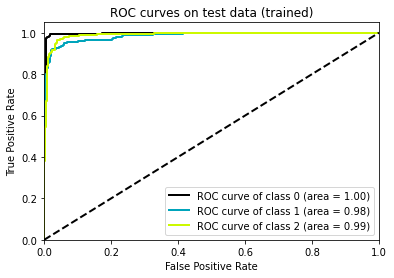

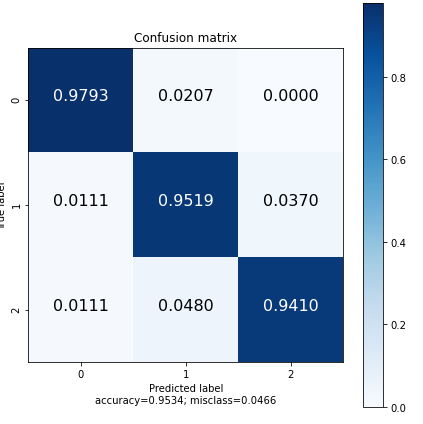

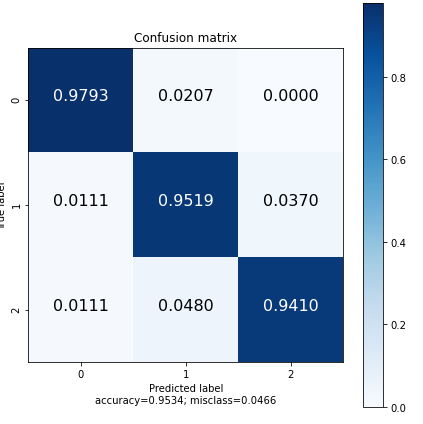

In [9]:
trainer2.cms[1] = None
preds, labels = trainer2.confusion_matrix_auc(1)
plot_roc(labels, preds)
plot_confusion_matrix(trainer2.cms[1], trainer2.class_names)

C:\Users\ngbra\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


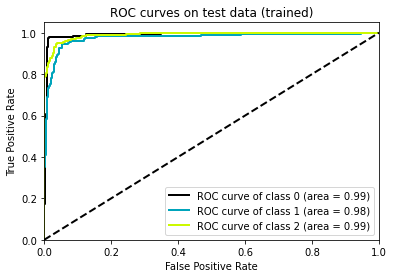

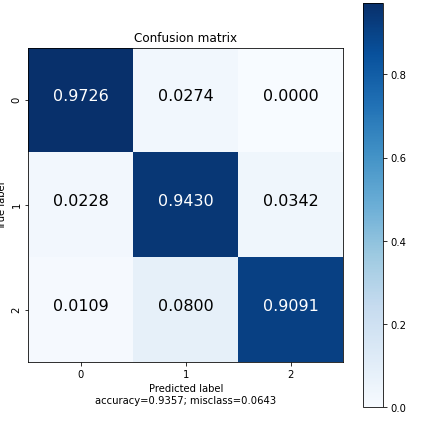

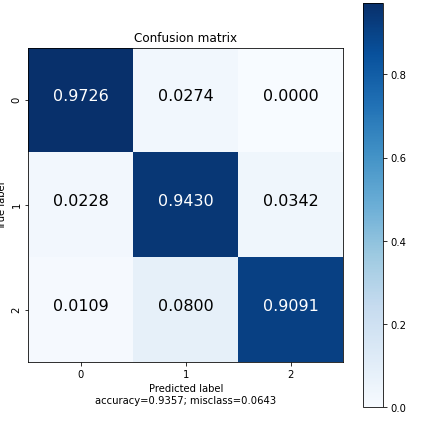

In [8]:
trainer2.cms[2] = None
preds, labels = trainer2.confusion_matrix_auc(2)
plot_roc(labels, preds)
plot_confusion_matrix(trainer2.cms[2], trainer2.class_names)

In [9]:
trainer.one_cycle()

  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.033767931163311005, acc:0.9936801166747691
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.08090417087078094, acc:0.9723032069970845
epoch number: 1
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.027999520301818848, acc:0.9941662615459407
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.05932318791747093, acc:0.9766763848396501
epoch number: 2
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.017889196053147316, acc:0.9980554205153136
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.0595686137676239, acc:0.978134110787172
epoch number: 3
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.02335205487906933, acc:0.9951385512882839
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.05542419105768204, acc:0.9766763848396501
epoch number: 4
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.02721882425248623, acc:0.9965969859017987

In [3]:
## Model weights
model = 'resnet18'
hp = {**DEFAULT_HP, 'model_name': f'{model}_224_1'}
trainer = Trainer('micro2', model, dls, hp, weights=None)
trainer.train_dl.dataset.train = False
trainer.scheduler.step_size=4
trainer.opt.param_groups[0]['weight_decay'] = 0
# trainer.load_weights(f'{model}_224_1.pkl')
trainer.one_cycle()

  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.5508038401603699, acc:0.7544968400583374
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.23197142779827118, acc:0.9169096209912536
epoch number: 1
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.11838744580745697, acc:0.9615945551774429
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.17226174473762512, acc:0.9431486880466472
epoch number: 2
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.04965517669916153, acc:0.9873602333495382
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.1435282677412033, acc:0.9431486880466472
epoch number: 3
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.03405097499489784, acc:0.9922216820612543
  0%|          | 0/17 [00:00<?, ?it/s]
epoch val info: loss:0.1329738050699234, acc:0.9475218658892128
epoch number: 4
  0%|          | 0/6 [00:00<?, ?it/s]
epoch trng info: loss:0.0355975404381752, acc:0.9927078269324259
  0%

In [7]:
trainer.confusion_matrix_auc(0)

KeyboardInterrupt: 